<a href="https://colab.research.google.com/github/pranishasharma/Python-project/blob/main/Final_Project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
api_key = '************************************'

channel_ids = ['UCwRH985XgMYXQ6NxXDo8npw', #KurzgesagtDE
               'UCxec_VgCE-5DUZ8MocKbEdg', #SWR Marktcheck
               'UCBzai1GXVKDdVCrwlKZg_6Q', #pulsreportage
               'UC1XrG1M_hw8103zO2x-oivg', #GalileoOffiziell
               'UCZuFrqyZWfw_Zf0OnXWUXyQ'] #bayerischerrundfunk

youtube = build('youtube', 'v3', developerKey=api_key)

In [3]:
#  defining a function to retrieve statistical information about YouTube channels.
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_ids)
    )
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return all_data


In [ ]:
get_channel_stats(youtube, channel_ids)

[{'Channel_name': 'PULS Reportage',
  'Subscribers': '882000',
  'Views': '369886183',
  'Total_videos': '1028',
  'playlist_id': 'UUBzai1GXVKDdVCrwlKZg_6Q'},
 {'Channel_name': 'Dinge Erklärt – Kurzgesagt',
  'Subscribers': '2190000',
  'Views': '269579357',
  'Total_videos': '139',
  'playlist_id': 'UUwRH985XgMYXQ6NxXDo8npw'},
 {'Channel_name': 'Galileo',
  'Subscribers': '3230000',
  'Views': '3044796636',
  'Total_videos': '6162',
  'playlist_id': 'UU1XrG1M_hw8103zO2x-oivg'},
 {'Channel_name': 'SWR Marktcheck',
  'Subscribers': '587000',
  'Views': '354638108',
  'Total_videos': '2420',
  'playlist_id': 'UUxec_VgCE-5DUZ8MocKbEdg'},
 {'Channel_name': 'Bayerischer Rundfunk',
  'Subscribers': '734000',
  'Views': '296762776',
  'Total_videos': '4162',
  'playlist_id': 'UUZuFrqyZWfw_Zf0OnXWUXyQ'}]

In [ ]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [ ]:
channel_data = pd.DataFrame(channel_statistics)

In [ ]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Galileo,3230000,3044796636,6162,UU1XrG1M_hw8103zO2x-oivg
1,Bayerischer Rundfunk,734000,296762776,4162,UUZuFrqyZWfw_Zf0OnXWUXyQ
2,SWR Marktcheck,587000,354638108,2420,UUxec_VgCE-5DUZ8MocKbEdg
3,PULS Reportage,882000,369886183,1028,UUBzai1GXVKDdVCrwlKZg_6Q
4,Dinge Erklärt – Kurzgesagt,2190000,269579357,139,UUwRH985XgMYXQ6NxXDo8npw


In [ ]:
# changing the data types to numeric
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

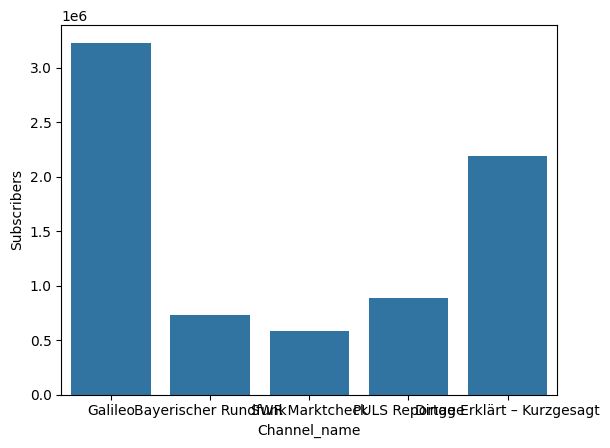

In [ ]:
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

Text(0.5, 1.0, 'YouTube Channel Subscribers Count')

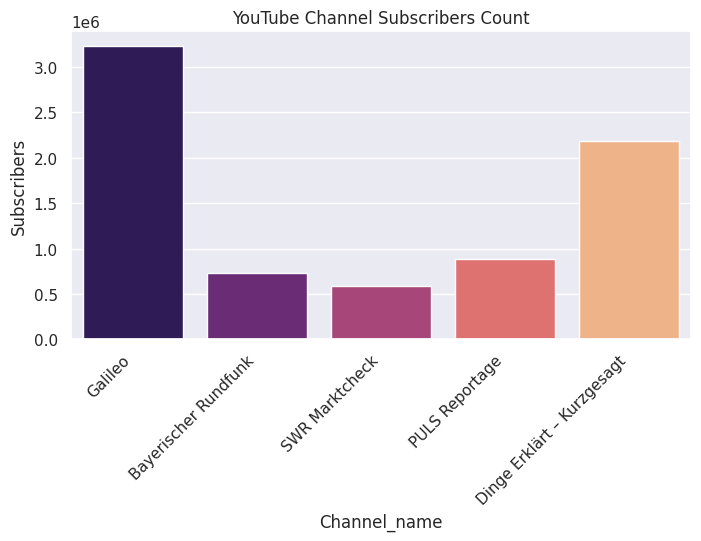

In [ ]:
# lets make the above plot better
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data, palette="magma", hue='Channel_name')
tick_positions = range(len(channel_data))
ax.set_xticks(tick_positions)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.yaxis.grid(True)
plt.title("YouTube Channel Subscribers Count")


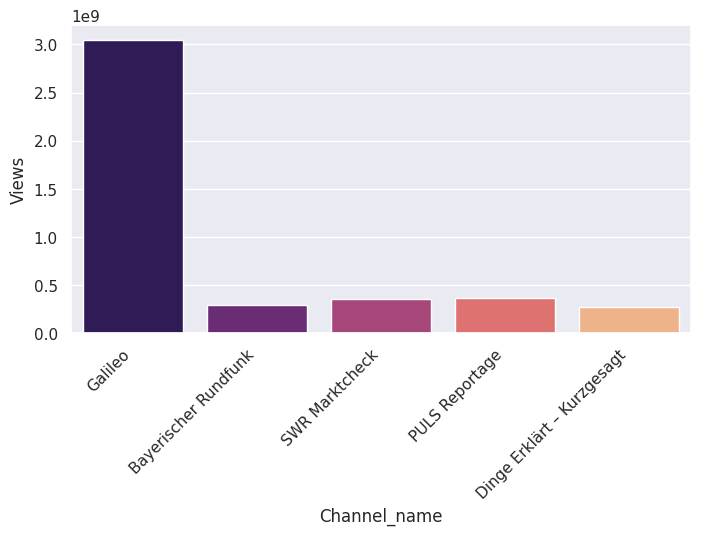

In [ ]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data, palette="magma", hue='Channel_name')
tick_positions = range(len(channel_data))
ax.set_xticks(tick_positions)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.yaxis.grid(True)

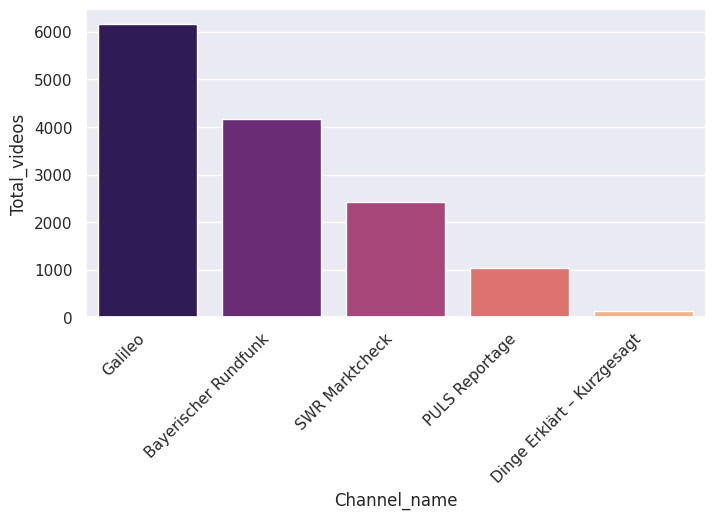

In [ ]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data, palette="magma", hue='Channel_name')
tick_positions = range(len(channel_data))
ax.set_xticks(tick_positions)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.yaxis.grid(True)

# **Function to get video IDs**

In [ ]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Galileo,3230000,3044796636,6162,UU1XrG1M_hw8103zO2x-oivg
1,Bayerischer Rundfunk,734000,296762776,4162,UUZuFrqyZWfw_Zf0OnXWUXyQ
2,SWR Marktcheck,587000,354638108,2420,UUxec_VgCE-5DUZ8MocKbEdg
3,PULS Reportage,882000,369886183,1028,UUBzai1GXVKDdVCrwlKZg_6Q
4,Dinge Erklärt – Kurzgesagt,2190000,269579357,139,UUwRH985XgMYXQ6NxXDo8npw


In [ ]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Galileo', 'playlist_id'].iloc[0]

In [ ]:
playlist_id

'UU1XrG1M_hw8103zO2x-oivg'

In [ ]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=50)
    response = request.execute()

    return response

In [ ]:
get_video_ids(youtube, playlist_id)
#  Here we get the entire API response.

{'kind': 'youtube#playlistItemListResponse',
 'etag': '4yzYaYjZs9qTgm5xt1cWcMN4LD8',
 'nextPageToken': 'EAAaelBUOkNESWlFRVJET1RNMk9UZEZOVVZHUXpBeE5EY29BVWlMbXRlTzR2R0VBMUFCV2pZaVEyaG9WbFpVUmxsamEyTjRWRlk1YjJSNlozaE5SRTQyVkhwS05FeFhPWEJrYldOVFEzZHBObmhqWlhaQ2FFUTBNMlpvYVNJ',
 'items': [{'kind': 'youtube#playlistItem',
   'etag': 'owv52M8Ijkq6kFFS1f0z45AFQa4',
   'id': 'VVUxWHJHMU1faHc4MTAzek8yeC1vaXZnLm0tbUEzWU83VGNF',
   'contentDetails': {'videoId': 'm-mA3YO7TcE',
    'videoPublishedAt': '2024-03-13T17:30:11Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'orbEKpIgMGuLE87IL9ho_y4oAWM',
   'id': 'VVUxWHJHMU1faHc4MTAzek8yeC1vaXZnLm15d0pzRFZONWNj',
   'contentDetails': {'videoId': 'mywJsDVN5cc',
    'videoPublishedAt': '2024-03-13T11:30:23Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'BvQ7zS4JFc7pXmbwH9xsE7K2DS8',
   'id': 'VVUxWHJHMU1faHc4MTAzek8yeC1vaXZnLjktMXZzX3BmSkZ3',
   'contentDetails': {'videoId': '9-1vs_pfJFw',
    'videoPublishedAt': '2024-03-12T15:00:07Z'}},
  {'kind

In [ ]:
# Modify the functiont to obtain a list of video IDs
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=50
    )
    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
      if next_page_token is None:
          more_pages = False
      else:
          request = youtube.playlistItems().list(
                      part='contentDetails',
                      playlistId=playlist_id,
                      maxResults=50,
                      pageToken=next_page_token)
          response = request.execute()

      for i in range(len(response['items'])):
          video_ids.append(response['items'][i]['contentDetails']['videoId'])

      next_page_token = response.get('nextPageToken')

    return video_ids


In [ ]:
video_ids = get_video_ids(youtube, playlist_id)

In [ ]:
video_ids

['m-mA3YO7TcE',
 'mywJsDVN5cc',
 '9-1vs_pfJFw',
 '0fv5Z16nEi0',
 '1-rhAPmozcs',
 'Uug-Dl-JBAk',
 'CphegX4MSJw',
 'zz1e7aF2cVI',
 'dWTG-7R1EP4',
 '8Jnl_YyMgjw',
 'q9CQ-1sr8tM',
 'qc1uBLwQw_4',
 'c34wI8Xkf4I',
 'YfzaebafhbE',
 'LTth83wgzKM',
 'P0zeOBUprvc',
 '_jH78b357og',
 'YMTrTxqDVXA',
 'lorpAYi3Lrc',
 'xDp-_neJlR8',
 't_uE2nwOoE8',
 'diPKZiVeIYU',
 'tFqIe1iKztU',
 'b5oD6kn_0-s',
 'E32O5tdHHuU',
 'OgXxiXEk7f8',
 '0epJfXqVbrk',
 'NQrYkmggg8w',
 '-SF2VMhuRpc',
 'U2QO6IhNtVs',
 'i2GJsooYexw',
 'RcObkDBiBpw',
 'bM0-mebV2z8',
 'Qf58cDyZyMg',
 'yTMnxmkQbyU',
 'Kd3H8VvUQrY',
 'GlmSAmVA5UE',
 '7sV4fm4oR7U',
 'e8-UuDxq61w',
 'oNKFSMTuGLE',
 '6WTRnEesrjc',
 'PLYkXf4myvI',
 'fYLlUJiuzxU',
 'OTrabNIM9bA',
 '-m_oT3rMpCw',
 'PZ9p6j5BkBA',
 'zC5LT5A4TCo',
 'Qlzg2jTdVLk',
 'xCYQCBr-iqA',
 'aYeUi3llDfg',
 '6QQ91dkyvXQ',
 'C1_ts9iKrbA',
 'fesFIuo0paY',
 '6fzNrr3orEs',
 'O38a984f7ac',
 'o0foz_NMJlU',
 'IXaHIzjm86Y',
 '-snWGGFxUXY',
 'OOeTUkx8rjs',
 'Qk1K9jRsIYE',
 'DeYUjvE2kc0',
 's27REBjbYFo',
 'AaHtkR

## **Function to get video details**

In [ ]:

def get_video_details(youtube, video_ids):
    all_video_stats = []

    for i in range(0, len(video_ids), 50):
        try:
            request = youtube.videos().list(
                part='snippet,statistics',
                id=','.join(video_ids[i:i+50])
            )
            response = request.execute()

            for video in response['items']:
                video_stats = dict(
                    Title=video['snippet']['title'],
                    Published_date=video['snippet']['publishedAt'],
                    Views=video['statistics']['viewCount'],
                    Likes=video['statistics'].get('likeCount', 0),  # Handle missing like count
                    #Dislikes=video['statistics'].get('dislikeCount', 0),
                    Comments=video['statistics'].get('commentCount', 0)
                )
                all_video_stats.append(video_stats)
        except Exception as e:
            print(f"Error fetching video details: {str(e)}")

    return all_video_stats


In [ ]:
video_details = get_video_details(youtube, video_ids)

In [ ]:
video_data = pd.DataFrame(video_details)

In [ ]:
video_data

,Title,Published_date,Views,Likes,Comments
0,50.000€ Schulgeld im Jahr: Wir begleiten eine ...,2024-03-13T17:30:11Z,36521,786,145
1,Deconstructed Rolex: Wir nehmen den Luxusuhren...,2024-03-13T11:30:23Z,72917,1224,148
2,Was steckt eigentlich genau hinter dem Fastenm...,2024-03-12T15:00:07Z,4174,147,18
3,Salalah Anti Gravity Point: Hebelt diese Straß...,2024-03-12T11:30:00Z,19899,369,47
4,"Zeit, die vielen tollen Frauen in der Wissensc...",2024-03-11T15:00:01Z,6165,229,2
...,...,...,...,...,...
6171,Ort der Woche: Skurille Wohnwagen | Galileo,2013-09-27T07:35:13Z,253480,1174,22
6172,Galileo Schlaumeier: Big Brother | Galileo,2013-09-27T07:34:19Z,24908,117,5
6173,Speedwissen: Körperpflege | Galileo,2013-09-27T07:33:20Z,951375,6084,541
6174,Galileo Schlaumeier: Eine Abfuhr erteilen | Ga...,2013-09-27T07:33:03Z,37187,271,39


In [ ]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data

,Title,Published_date,Views,Likes,Comments
0,50.000€ Schulgeld im Jahr: Wir begleiten eine ...,2024-03-13,36521,786,145
1,Deconstructed Rolex: Wir nehmen den Luxusuhren...,2024-03-13,72917,1224,148
2,Was steckt eigentlich genau hinter dem Fastenm...,2024-03-12,4174,147,18
3,Salalah Anti Gravity Point: Hebelt diese Straß...,2024-03-12,19899,369,47
4,"Zeit, die vielen tollen Frauen in der Wissensc...",2024-03-11,6165,229,2
...,...,...,...,...,...
6171,Ort der Woche: Skurille Wohnwagen | Galileo,2013-09-27,253480,1174,22
6172,Galileo Schlaumeier: Big Brother | Galileo,2013-09-27,24908,117,5
6173,Speedwissen: Körperpflege | Galileo,2013-09-27,951375,6084,541
6174,Galileo Schlaumeier: Eine Abfuhr erteilen | Ga...,2013-09-27,37187,271,39


In [ ]:
top10_videos = video_data.sort_values(by='Views',ascending=False).head(10)

In [ ]:
top10_videos

,Title,Published_date,Views,Likes,Comments
5706,Wahnsinn! Unglaubliches über den menschlichen ...,2015-06-14,38439966,36500,1780
5760,1 Tag Geschlechtsumwandlung: Aus Mann mach Fra...,2015-05-11,14870680,111770,7848
6051,"""C-String"" - Der kleinste Bikini der Welt! Der...",2014-01-11,13233622,26494,2300
3491,Der größte Teenager der Welt - wie lebt es sic...,2018-07-28,13021181,109754,9389
5868,18.000€ - Das teuerste Luxus-Flugticket der We...,2015-02-03,11178473,99706,6380
5541,80kg! Hulk ist der größte Pitbull der Welt! | ...,2015-09-16,10630505,79402,4858
4094,Spicker im Test - Lehrer vs. Schüler | Galileo...,2017-10-02,9669893,133478,6022
4976,25 Jahre nur Pizza essen!? Wie (un)gesund ist ...,2016-07-08,9545536,96817,10664
5322,Türkische Hochzeit - So pompös wird gefeiert! ...,2016-01-18,9122522,61359,7411
5920,Viagra für Frauen?! 15 intime Mythen | Galileo...,2014-10-29,8261799,41206,2000


In [ ]:
# top10_videos.replace(to_replace="How Statistics Saved the US SERIOUS $$$$ During WW2 #Shorts",
#            value="How Statistics Saved the US SERIOUS Dollars During WW2 #Shorts",inplace=True)

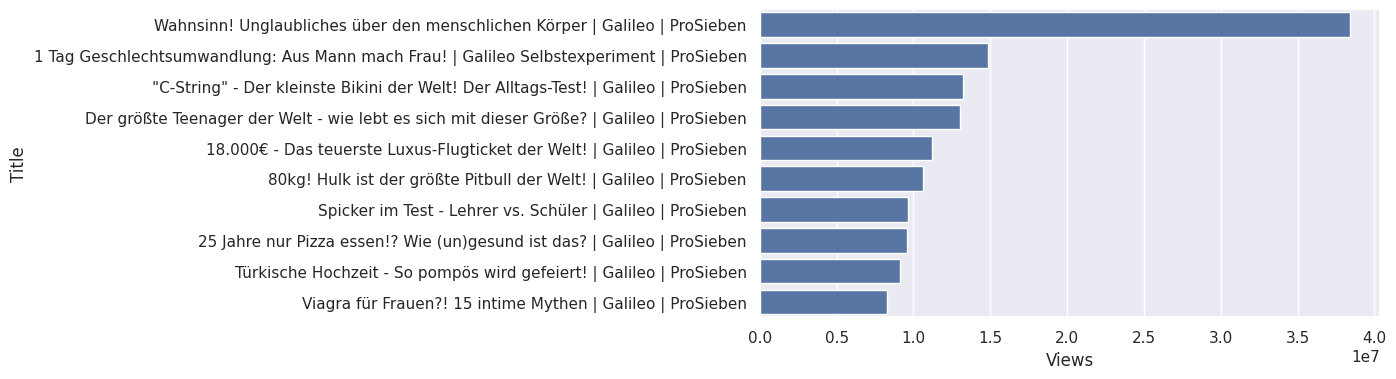

In [ ]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

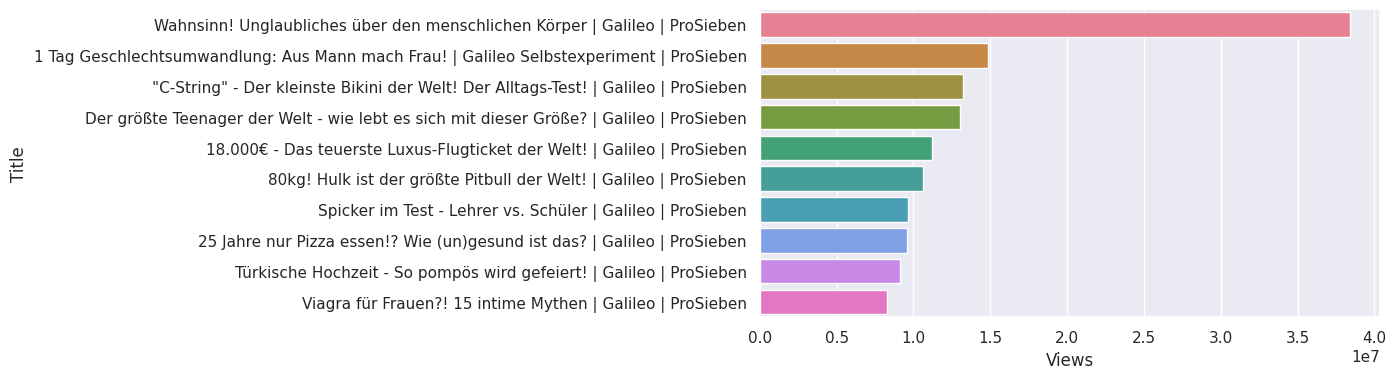

In [ ]:
colors = sns.color_palette('husl', n_colors=len(top10_videos))
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos,palette=colors, hue='Title')

In [ ]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [ ]:
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,50.000€ Schulgeld im Jahr: Wir begleiten eine ...,2024-03-13,36521,786,145,Mar
1,Deconstructed Rolex: Wir nehmen den Luxusuhren...,2024-03-13,72917,1224,148,Mar
2,Was steckt eigentlich genau hinter dem Fastenm...,2024-03-12,4174,147,18,Mar
3,Salalah Anti Gravity Point: Hebelt diese Straß...,2024-03-12,19899,369,47,Mar
4,"Zeit, die vielen tollen Frauen in der Wissensc...",2024-03-11,6165,229,2,Mar
...,...,...,...,...,...,...
6171,Ort der Woche: Skurille Wohnwagen | Galileo,2013-09-27,253480,1174,22,Sep
6172,Galileo Schlaumeier: Big Brother | Galileo,2013-09-27,24908,117,5,Sep
6173,Speedwissen: Körperpflege | Galileo,2013-09-27,951375,6084,541,Sep
6174,Galileo Schlaumeier: Eine Abfuhr erteilen | Ga...,2013-09-27,37187,271,39,Sep


In [ ]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [ ]:
videos_per_month

,Month,size
0,Apr,473
1,Aug,460
2,Dec,551
3,Feb,520
4,Jan,568
5,Jul,471
6,Jun,492
7,Mar,509
8,May,498
9,Nov,557


In [ ]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [ ]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [ ]:
videos_per_month = videos_per_month.sort_index()

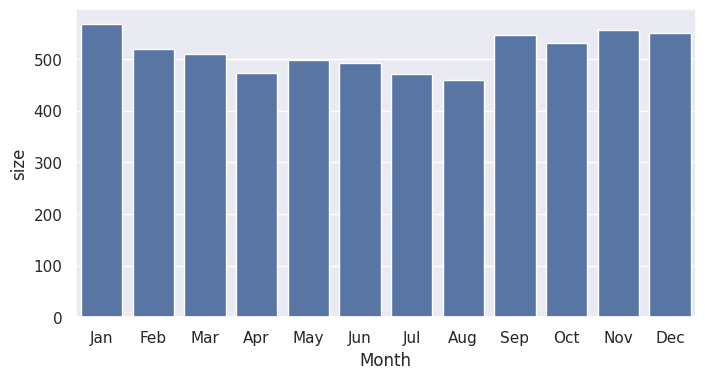

In [ ]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

In [ ]:
# video_data.to_csv('Video_Details(YT Channels data).csv')